In [10]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)

import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

from sklearn import model_selection
from sklearn import neighbors
from sklearn import datasets
from sklearn import preprocessing
from sklearn import pipeline
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn import feature_selection

In [11]:
Xdf=pd.read_csv('hw2_problem_5_X.csv')
ydf=pd.read_csv('hw2_problem_5_y.csv')
Xdf_blind=pd.read_csv('hw2_problem_5_X_blind.csv')
X=np.array(Xdf.values[:,1:],dtype=np.float64)
y=np.array(ydf.values[:,1],dtype=np.float64)
X_blind=np.array(Xdf_blind.values[:,1:],dtype=np.float64)
# split data into training and validation dataset
X_train, X_valid, y_train, y_valid = model_selection.train_test_split(X, y, random_state=42)

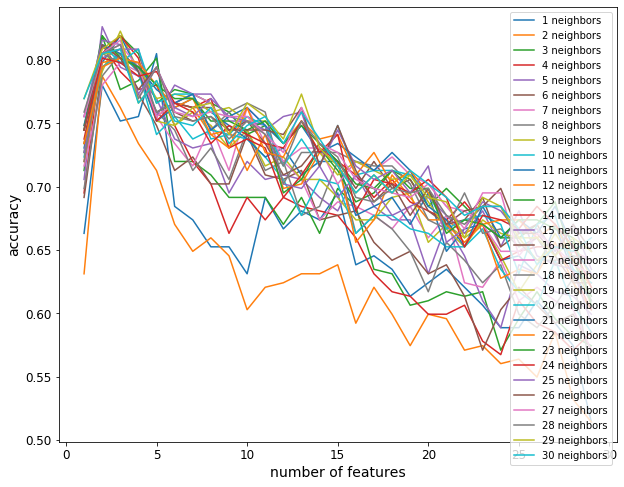

best value of k is 5
highest accuracy is 0.8262411347517731
best number of features is 2


In [13]:
fig=plt.figure(figsize=[10,8])
n_neighbors = list(range(1, 31))
best_acc = 0

for n in n_neighbors:
    cls = neighbors.KNeighborsClassifier(n_neighbors = n)
    k_feature = np.arange(1,30)
    acc_list = []
    for k in k_feature:
        uni = feature_selection.SelectKBest(k = k)
        pipe = pipeline.Pipeline([('fs', uni), ('cls', cls)])
        pipe.fit(X_train, y_train)
        acc = accuracy_score(y_valid, pipe.predict(X_valid))
        acc_list.append(acc)
        max_acc = max(acc_list)
        if best_acc < max_acc:
            best_acc = max_acc
            best_feature = k
            best_neighbor = n
    plt.plot(k_feature, acc_list, label = str(n) + " neighbors")
    plt.legend()
plt.xlabel('number of features')
plt.ylabel('accuracy')
plt.show()

print("best value of k is "+str(best_neighbor))
print("highest accuracy is "+str(best_acc))
print("best number of features is "+str(best_feature))

In [15]:
cls = neighbors.KNeighborsClassifier(n_neighbors = best_neighbor)
uni = feature_selection.SelectKBest(k = best_feature)
pipe = pipeline.Pipeline([('fs', uni), ('cls', cls)])
pipe.fit(X_train, y_train)
Xdf=pd.DataFrame(pipe.predict(X_blind))
Xdf.to_csv('./hw2_problem_5_y_blind_predict.csv')

Qestion 6

a. about 15 hours \
b. I adhered to the Duke Community Standard in the completion of this assignment